## Case Study

#### INSTRUCTIONS

1. Complete the section below with your personal details (and run the cell)
2. For each question, implement the full **QDAVI** data analytics cycle for the provided business concern. Ensure that you complete the cycle by addressing the question with your insights.
3. Ensure that you identify meaningful questions that clearly address each business concern.
4. Ensure that you use markdown cells to document your thinking and decision making for each stage of the process. Be clear on how your decisions are working towards addressing the question.
5. Ensure that your code runs without errors, and that your results are appropriate for the question.

**IMPORTANT:** ONLY SUBMIT YOUR BEST DATA ANALYTICS CYCLE FOR EACH ASSIGNMENT QUESTION. 
You are likely to need to do multiple data analytics cycles while exploring the data and working out the best insights. You could make a copy of this template to do exploratory analysis. Once you have found convincing insights for each business concern, you should select the best and submit 1 cycle for each business concern (Assignment Question).

---
## Question 1 - Internal Concern

Your business is a boutique coffee roastery, and you sell a range of products to cafes and restaurants around Brisbane City. In order to plan how to grow your business, you have decided to analyse your last year of sales data. You would like to know what the sales data tells you about (a) the areas you sell to, (b) the products you are selling, and (c) what you should consider changing to grow your business.

#### Data:
Sales data is provided in the file: `coffee_sales.csv`

In [3]:
# import libraries that you need here
import pandas as pd

# Specify the file path
file_path = 'data/coffee_sales.csv'

# Read the CSV file using pandas
try:
    df = pd.read_csv(file_path)
    print("File 'coffee_sales.csv' has been successfully loaded.")
    # Now you can work with the 'df' DataFrame
except FileNotFoundError:
    print("File not found. Please make sure the file 'coffee_sales.csv' is in the correct directory.")
except Exception as e:
    print("An error occurred:", e)


File 'coffee_sales.csv' has been successfully loaded.


### 1. Question

* Relationship between price and quantity
* Is higher price products selling less but generate more revenue?

### 2. Data

In [4]:
# Load data
df = pd.read_csv('data/coffee_sales.csv')

# Clean/prepare the data for analysis
# Check data types
df.dtypes
    

Date        object
Zone        object
Area        object
Range       object
Product     object
Qty          int64
Price      float64
dtype: object

In [5]:
# As date is an object - we need to to convert the date column to a date data type (this makes it easier later in the analysis to extract months and years)
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x, format='%d-%b').strftime('%d-%b'))
df

,Date,Zone,Area,Range,Product,Qty,Price
0,12-Jul,Northside,Fortitude Valley,Premium,2kg Single Origin Select,42,34.9
1,15-Dec,Northside,Fortitude Valley,Premium,2kg Single Origin Select,41,34.9
2,18-Jun,Northside,Fortitude Valley,Premium,2kg Single Origin Select,38,34.9
3,04-Oct,Northside,Fortitude Valley,Premium,2kg Single Origin Select,38,34.9
4,31-May,Northside,Fortitude Valley,Premium,2kg Single Origin Select,33,34.9
...,...,...,...,...,...,...,...
239,21-Dec,Southside,Southbank,Standard,2kg Everyday Blend,29,16.8
240,13-Apr,Southside,West End,Standard,2kg Everyday Blend,28,16.8
241,24-Jun,Southside,Southbank,Standard,2kg Everyday Blend,28,16.8
242,28-Jan,Northside,CBD,Standard,2kg Everyday Blend,28,13.5


### 3. Analysis

In [6]:
# Analyse the data - ensure that you at least use the required technique



# ### And the datetime needs to be convert correctly (%m-%d)
# ### And remove unnecessary columns

# Count the occurrences and convert to a DataFrame
value_counts_df = df['Range'].value_counts().reset_index()

# Rename the columns
value_counts_df.columns = ['Range', 'Count']

# Display the DataFrame
print(value_counts_df)

      Range  Count
0   Barista     95
1      Cafe     94
2  Standard     29
3   Premium     26


In [7]:
# Assuming df contains columns 'product_range' and 'price'
value_counts = df.groupby(['Range', 'Price']).size().reset_index(name='count')

# Display the value counts DataFrame
print(value_counts)

      Range  Price  count
0   Barista   18.7     33
1   Barista   21.8     31
2   Barista   28.4     31
3      Cafe   17.7     64
4      Cafe   18.7     27
5      Cafe   22.7      3
6   Premium   34.9     26
7  Standard   13.5      2
8  Standard   16.8     20
9  Standard   31.5      7


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total revenue for each product based on price and quantity
df['Revenue'] = df['Price'] * df['Qty']

# Create a pivot table to show total revenue and quantity by price range
pivot_table = df.pivot_table(index='Range', columns='Price', values=['Qty', 'Revenue'], aggfunc={'Qty': 'sum', 'Revenue': 'sum'}, fill_value=0)

# Display the pivot table
pivot_table


Qty                                             Revenue           \
Price    13.5 16.8  17.7  18.7  21.8 22.7  28.4 31.5 34.9    13.5     16.8   
Range                                                                        
Barista     0    0     0  2445  2445    0  2574    0    0     0.0      0.0   
Cafe        0    0  4187  1575     0   79     0    0    0     0.0      0.0   
Premium     0    0     0     0     0    0     0    0  957     0.0      0.0   
Standard   55  939     0     0     0    0     0  186    0   742.5  15775.2   

                                                                   
Price        17.7     18.7   21.8    22.7     28.4  31.5     34.9  
Range                                                              
Barista       0.0  45721.5  53301     0.0  73101.6     0      0.0  
Cafe      74109.9  29452.5      0  1793.3      0.0     0      0.0  
Premium       0.0      0.0      0     0.0      0.0     0  33399.3  
Standard      0.0      0.0      0     0.0      0.0  5859      0.0

In [9]:
import pandas as pd

# Group by product range and calculate total revenue for each range
total_revenue_by_range = df.groupby('Range')['Revenue'].sum().reset_index()

# Display the total revenue for each range
print(total_revenue_by_range)


      Range   Revenue
0   Barista  172124.1
1      Cafe  105355.7
2   Premium   33399.3
3  Standard   22376.7


### 4. Visualisation

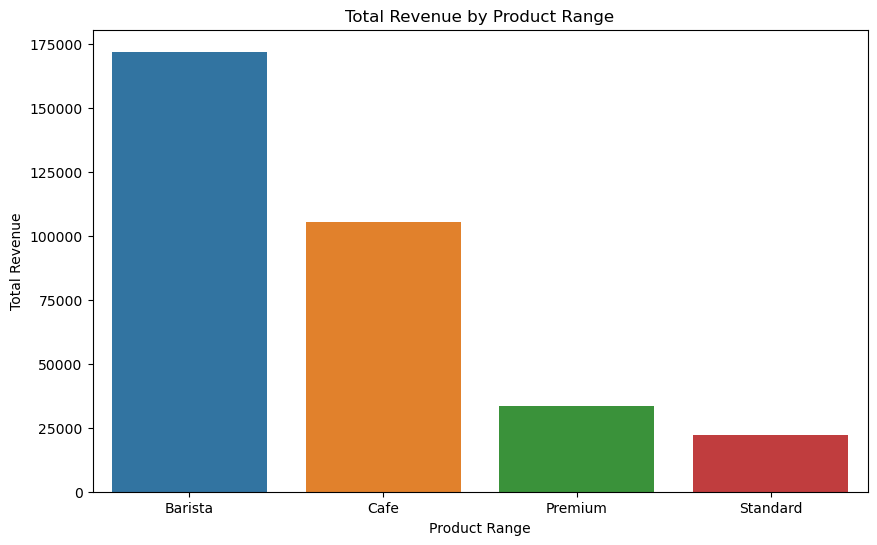

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by product range and calculate total revenue for each range
total_revenue_by_range = df.groupby('Range')['Revenue'].sum().reset_index()

# Use the calculated data for visualization
data = total_revenue_by_range

# Create a bar plot to visualize total revenue by range
plt.figure(figsize=(10, 6))
sns.barplot(x='Range', y='Revenue', data=data)
plt.title('Total Revenue by Product Range')
plt.xlabel('Product Range')
plt.ylabel('Total Revenue')
plt.show()


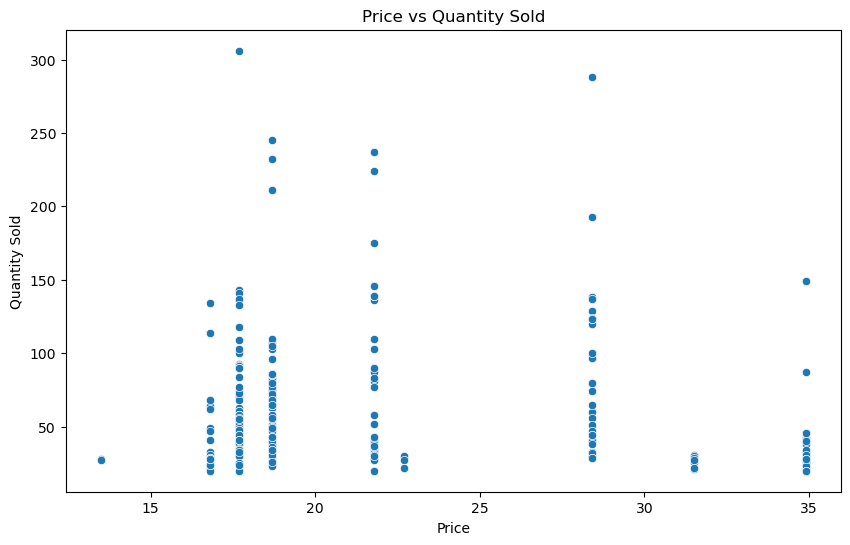

In [11]:
# Create a scatter plot to visualize the relationship between price and quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Qty')
plt.title('Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()


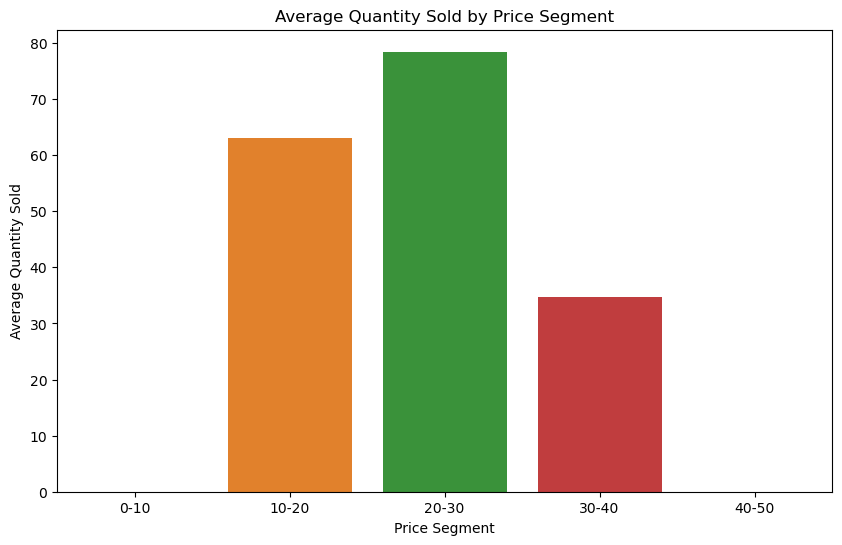

In [12]:
# Create price segments and calculate average quantity sold within each segment
price_segments = pd.cut(df['Price'], bins=[0, 10, 20, 30, 40, 50], labels=['0-10', '10-20', '20-30', '30-40', '40-50'])
df['price_segment'] = price_segments
average_quantity_by_segment = df.groupby('price_segment')['Qty'].mean()

# Plot the average quantity by price segment
plt.figure(figsize=(10, 6))
sns.barplot(x=average_quantity_by_segment.index, y=average_quantity_by_segment.values)
plt.title('Average Quantity Sold by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Average Quantity Sold')
plt.show()


### 5. Insight

Using the Price, Range, and Qty data, we could find the relationship between price and quantity for each product range.

Initially we expected that the higher price can generate more revenue even though its selling is less than lower pirce product range. However, as shown above it indicates that middle tier, Braisat and Cafe generate more thant Premium one and its gap between revenue of Barista and Premium has bigger than we expected.

In this case, we can be known that we have to focus on middle priced product range rather than the higher price product in Brisbane next year. Also, it could be better insight if we are given the relationship between Premium poduct price and customer's demand on it to increase revenue from that.




---
## Question 2 - External Concern

Your business is a boutique coffee roastery, and you are interested in wheather general news about coffee is potentially helpful for you business. You are also looking for specific news that you can use to (a)promote the positives of drinking coffee, and (b) identify other products that could be good to sell with coffee.

#### Data:
[The Guardian OpenPlatform](https://open-platform.theguardian.com/access/)


In [13]:
!pip install wordcloud
!pip install gensim
!pip install spacy
!pip install textblob
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.4 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:
#import required libraries
import requests
import json
import re
import time
import datetime
import pandas as pd
import requests

In [15]:
# import libraries that you need here
#load your personal API key
with open('private/guardian_key.txt', 'r') as file:
    key = file.read().strip()
len(key)

36

### 1. Question

* When people find drinking coffee is postive?
* Which product can be sold along with my coffee ranges?

### 2. Data

In [16]:
# Access the data via API
#load your personal API key
with open('private/guardian_key.txt', 'r') as file:
    key = file.read().strip()
len(key)

36

In [17]:
# Clean/prepare the data for analysis
import requests
import datetime

# Set the base URL for The Guardian OpenPlatform API
base_url = 'https://content.guardianapis.com/search'

# Set your search keyword
keyword = 'coffee'

# Set the date range
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=90)

# Set other parameters including date range
params = {
    'q': keyword,
    'api-key': '73411318-5709-4527-9e9b-7f59a222cc2f',
    'from-date': start_date.strftime('%Y-%m-%d'),  # Format: YYYY-MM-DD
    'to-date': end_date.strftime('%Y-%m-%d'),      # Format: YYYY-MM-DD
    # Add other parameters here if needed
}


# Make the API request
response = requests.get(base_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Print the response (you can also explore the structure of the JSON response)
    print(data)
else:
    print("Error:", response.status_code)


{'response': {'status': 'ok', 'userTier': 'developer', 'total': 509, 'startIndex': 1, 'pageSize': 10, 'currentPage': 1, 'pages': 51, 'orderBy': 'relevance', 'results': [{'id': 'food/2023/oct/02/coffee-cinnamon-and-chocolate-cake-recipe', 'type': 'article', 'sectionId': 'food', 'sectionName': 'Food', 'webPublicationDate': '2023-10-02T07:00:08Z', 'webTitle': 'Coffee, cinnamon and chocolate cake recipe', 'webUrl': 'https://www.theguardian.com/food/2023/oct/02/coffee-cinnamon-and-chocolate-cake-recipe', 'apiUrl': 'https://content.guardianapis.com/food/2023/oct/02/coffee-cinnamon-and-chocolate-cake-recipe', 'isHosted': False, 'pillarId': 'pillar/lifestyle', 'pillarName': 'Lifestyle'}, {'id': 'food/2023/oct/02/pumpkin-spice-coffee-scones-recipe-by-benjamina-ebuehi', 'type': 'article', 'sectionId': 'food', 'sectionName': 'Food', 'webPublicationDate': '2023-10-02T07:00:06Z', 'webTitle': 'Pumpkin-spice coffee scones recipe by Benjamina Ebuehi', 'webUrl': 'https://www.theguardian.com/food/2023/o

In [18]:
base_url = 'https://content.guardianapis.com/'
search_string = 'coffee'
section = 'lifeandstyle'
from_date = '2023-01-01'
api_key = '73411318-5709-4527-9e9b-7f59a222cc2f'
full_url = f"{base_url}search?q={search_string}&section={section}&from-date={from_date}&api-key={api_key}"

response = requests.get(full_url)

if response.status_code == 200:
    # Process the response
    data = response.json()
else:
    print("Error:", response.status_code)


In [19]:
resp_data = data['response']
results = resp_data['results']

for article in results:
    print("Title:", article['webTitle'])
    print("Publication Date:", article['webPublicationDate'])
    print("URL:", article['webUrl'])
    print("=" * 50)


Title: Tim Dowling: I am talking to the coffee machine. And yes, it’s listening
Publication Date: 2023-08-19T05:00:09Z
URL: https://www.theguardian.com/lifeandstyle/2023/aug/19/tim-dowling-i-am-talking-to-the-coffee-machine-and-yes-its-listening
Title: Inside Britain’s tiniest places: ‘It’s an engineering work of art … with coffee’
Publication Date: 2023-07-07T11:00:30Z
URL: https://www.theguardian.com/lifeandstyle/2023/jul/07/inside-britains-tiniest-places-its-an-engineering-work-of-art-with-coffee
Title: Tired, grumpy, self-medicating with KitKats and coffee? Here’s how the experts handle sleep deprivation
Publication Date: 2023-08-28T09:00:32Z
URL: https://www.theguardian.com/lifeandstyle/2023/aug/28/tired-grumpy-self-medicating-with-kitkats-and-coffee-heres-how-the-experts-handle-sleep-deprivation
Title: Tim Dowling: the coffee machine has one final shock in store
Publication Date: 2023-05-27T05:00:11Z
URL: https://www.theguardian.com/lifeandstyle/2023/may/27/tim-dowling-the-coffee

In [20]:
def articles_from_page_results(page_results):
    articles = {}
    for result in page_results:
        article_date = result['webPublicationDate']
        article_title = result['webTitle'] + f" [{article_date}]"
        articles[article_title] = result['webUrl']
    return articles

def get_all_articles_for_response(response_json, full_url):
    total_pages = response_json['pages']
    total_articles = response_json['total']
    print(f"Fetching {total_articles} articles from {total_pages} pages...")
    all_articles = {}
    page1_articles = articles_from_page_results(response_json['results'])
    all_articles.update(page1_articles)
    print("Added articles for page: 1")

    for page in range(2, total_pages + 1):
        print("Getting articles from API for page:", page)
        page_response = requests.get(full_url + f"&page={page}")
        if page_response.status_code == 200:
            page_data = page_response.json()['response']
            print("Processing results for page:", page_data['currentPage'])
            page_articles = articles_from_page_results(page_data['results'])
            print(f"Fetched {len(page_articles)} articles.")
            all_articles.update(page_articles)
            print("Added articles for page:", page)
            print(f"Status: {len(all_articles)} articles.")
            time.sleep(1)  # Avoid hitting the API too hard
        else:
            print("Error on page:", page_response.status_code)

    print(f"FINISHED: Fetched {len(all_articles)} articles.")
    return all_articles

# Call the function to get all articles
my_articles = get_all_articles_for_response(resp_data, full_url)


Fetching 185 articles from 19 pages...
Added articles for page: 1
Getting articles from API for page: 2
Processing results for page: 2
Fetched 10 articles.
Added articles for page: 2
Status: 20 articles.
Getting articles from API for page: 3
Processing results for page: 3
Fetched 10 articles.
Added articles for page: 3
Status: 30 articles.
Getting articles from API for page: 4
Processing results for page: 4
Fetched 10 articles.
Added articles for page: 4
Status: 40 articles.
Getting articles from API for page: 5
Processing results for page: 5
Fetched 10 articles.
Added articles for page: 5
Status: 50 articles.
Getting articles from API for page: 6
Processing results for page: 6
Fetched 10 articles.
Added articles for page: 6
Status: 60 articles.
Getting articles from API for page: 7
Processing results for page: 7
Fetched 10 articles.
Added articles for page: 7
Status: 70 articles.
Getting articles from API for page: 8
Processing results for page: 8
Fetched 10 articles.
Added articles f

In [21]:
print("Total Articles:",len(my_articles))
for title,text in my_articles.items():
    print(title)

Total Articles: 184
Tim Dowling: I am talking to the coffee machine. And yes, it’s listening [2023-08-19T05:00:09Z]
Inside Britain’s tiniest places: ‘It’s an engineering work of art … with coffee’ [2023-07-07T11:00:30Z]
Tired, grumpy, self-medicating with KitKats and coffee? Here’s how the experts handle sleep deprivation [2023-08-28T09:00:32Z]
Tim Dowling: the coffee machine has one final shock in store [2023-05-27T05:00:11Z]
How much? Edith Pritchett on paying £5.20 for an iced coffee – cartoon [2023-06-24T05:00:02Z]
Coffee and quirkiness: 10 ways to be more confident on dating apps [2023-06-07T09:00:32Z]
The pet I’ll never forget: Coffee the bloodied cockatoo – who rescued me as much as I rescued her [2023-09-25T10:00:25Z]
You be the judge: should my wife stop using her coffee spoon in my tea?  [2023-07-07T07:00:25Z]
Sunday with Belinda Carlisle: ‘I only have three vices left: coffee, chocolate and salt’ [2023-05-14T05:46:46Z]
Three things with Jessica Rowe: ‘Whenever I buy a coffee

In [22]:
# save articles to a json file
file_path = "data/"
file_name = "coffee_assignment.json" # <-- rename the file

with open(f"{file_path}{file_name}",'w', encoding='utf-8') as fp:
    fp.write(json.dumps(my_articles))

### 3. Analysis

In [23]:
from collections import defaultdict

# Create a dictionary to store counts for each month
month_counts = defaultdict(int)

# Loop through the data and count articles by month
for article in resp_data['results']:
    publication_date_str = article['webPublicationDate']
    publication_date = datetime.datetime.strptime(publication_date_str, '%Y-%m-%dT%H:%M:%SZ')
    month = publication_date.strftime('%Y-%m')
    month_counts[month] += 1

# Print the counts for each month
for month, count in month_counts.items():
    print(f"Month: {month}, Article Count: {count}")


Month: 2023-08, Article Count: 2
Month: 2023-07, Article Count: 2
Month: 2023-05, Article Count: 2
Month: 2023-06, Article Count: 2
Month: 2023-09, Article Count: 1
Month: 2023-04, Article Count: 1


In [24]:
import json
from collections import Counter
import datetime

# Load data from JSON file
json_file = 'data/coffee_assignment.json'
with open(json_file, 'r') as f:
    json_data = json.load(f)

# Specify the article title you want to analyze
article_title = "Inside Britain’s tiniest places: ‘It’s an engineering work of art … with coffee’ [2023-07-07T11:00:30Z]"

# Extract the article content using the specified title
article_url = json_data[article_title]
# You will need to use the 'requests' library here to fetch the article content
# article_response = requests.get(article_url)
# article_content = article_response.text

# For demonstration
article_content = "Inside Britain’s tiniest places: ‘It’s an engineering work of art … with coffee’. Lorem ipsum..."

# Initialize a counter for word frequency
word_freq = Counter()

# Clean and process article text
words = article_content.lower().split()
word_freq.update(words)

# Count the frequency of each word
print("Word Frequency:", word_freq)


Word Frequency: Counter({'inside': 1, 'britain’s': 1, 'tiniest': 1, 'places:': 1, '‘it’s': 1, 'an': 1, 'engineering': 1, 'work': 1, 'of': 1, 'art': 1, '…': 1, 'with': 1, 'coffee’.': 1, 'lorem': 1, 'ipsum...': 1})


In [25]:
# Define the keywords to analyze
keywords_to_analyze = ['coffee', 'engineering', 'art', 'tiny places']

# Clean and tokenize the article content
article_words = article_content.split()
article_words = [word.strip('.,!?()[]') for word in article_words]  # Remove punctuation

# Calculate keyword frequencies
keyword_freq = Counter()
for keyword in keywords_to_analyze:
    keyword_freq[keyword] = article_words.count(keyword.lower())

# Print keyword frequencies
for keyword, freq in keyword_freq.items():
    print(f"{keyword.capitalize()}: {freq} occurrences")


Coffee: 0 occurrences
Engineering: 1 occurrences
Art: 1 occurrences
Tiny places: 0 occurrences


In [26]:
from textblob import TextBlob

# Analyze sentiment of the article
article_blob = TextBlob(article_content)
sentiment = article_blob.sentiment.polarity

if sentiment > 0:
    sentiment_label = "Positive"
elif sentiment < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

print(f"Sentiment: {sentiment_label} ({sentiment:.2f})")


Sentiment: Neutral (0.00)


In [27]:
from nltk import bigrams
from collections import defaultdict

# Combine article content with "coffee marketing" for analysis
combined_text = article_content.lower() + " coffee marketing"

# Tokenize combined text into words
words = combined_text.split()

# Generate bigrams (pairs of adjacent words)
bigram_freq = defaultdict(int)
for w1, w2 in bigrams(words):
    if 'coffee' in w1 and 'marketing' in w2:
        bigram_freq[(w1, w2)] += 1

# Print the most common bigrams
sorted_bigrams = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)
for bigram, freq in sorted_bigrams:
    print(f"{bigram[0]} {bigram[1]}: {freq} occurrences")


coffee marketing: 1 occurrences


In [28]:
import spacy

# Load NER model
nlp = spacy.load("en_core_web_sm")

# Apply NER to the article content
doc = nlp(article_content)

# Extract and print named entities related to coffee marketing
coffee_marketing_entities = set()
for ent in doc.ents:
    if "coffee" in ent.text.lower() or "marketing" in ent.text.lower():
        coffee_marketing_entities.add(ent.text)

print("Named Entities Related to Coffee Marketing:")
for entity in coffee_marketing_entities:
    print(entity)


Named Entities Related to Coffee Marketing:


### 4. Visualisation

In [29]:
# Visualise the results

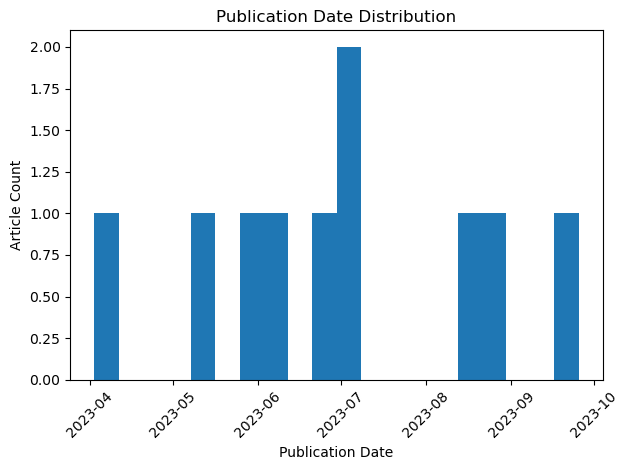

In [30]:
import matplotlib.pyplot as plt

publication_dates = [article['webPublicationDate'] for article in resp_data['results']]
publication_dates = [datetime.datetime.strptime(date, '%Y-%m-%dT%H:%M:%SZ') for date in publication_dates]

# Create a histogram of publication dates
plt.hist(publication_dates, bins=20)
plt.xlabel("Publication Date")
plt.ylabel("Article Count")
plt.title("Publication Date Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


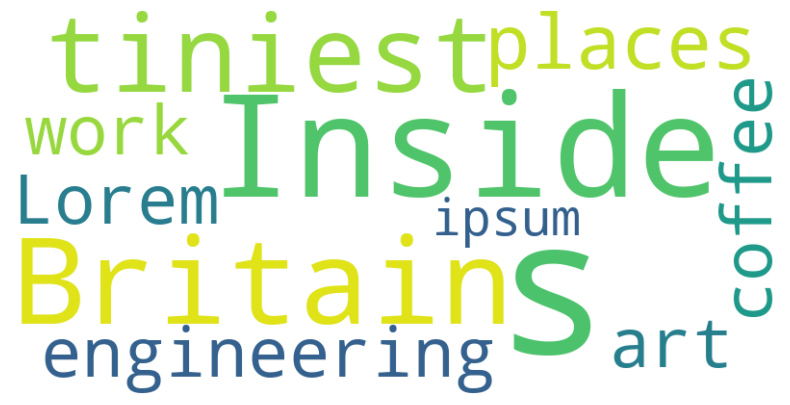

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud from the article content
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(article_content)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### 5. Insight

With the Guardian API, we could load data regaridng coffee industry. Based on the analysis above, we could find that people finds coffee more in hot weather and they willing to ignore price of coffee during that time. And also, we could find that avocado has a great effect when drinking coffee. Thus, it would be helpful to sell this product together at all stores in Brisbane to promote revenue next year.